## Análisis no lineal de series de tiempo
### Fractalidad y Entropía

sample entropy (sampen)
correlation dimension (corr_dim)
Lyapunov exponent (lyap_r, lyap_e)
Hurst exponent (hurst_rs)
detrended fluctuation analysis (DFA) (dfa)


https://pypi.org/project/nolds/

### Aleatoriedad

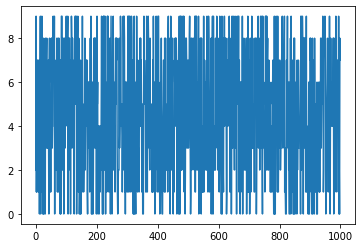

In [3]:
#Random
import nolds #importa operciones lyapunov
import numpy as np
from random import seed
from random import randrange
import matplotlib.pyplot as plt
seed(1)

Rand = [randrange(10) for i in range(1000)]

plt.plot(Rand) #Funcion imprimir resultado, librería.quéhacer(qué imprimir)
plt.show()



In [8]:
h = nolds.dfa(Rand) 
h

0.5482641645997774

In [9]:
SampEnt=nolds.sampen(Rand)
SampEnt

2.2566399345589017

### Movimiento browniano

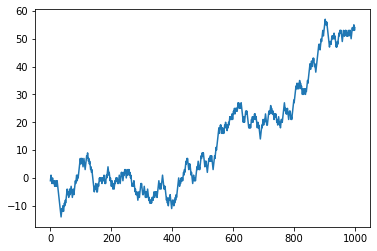

In [10]:
#Brownian

from random import seed
from random import random
from matplotlib import pyplot
seed(1)
Brow = list()
Brow.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	movement = -1 if random() < 0.5 else 1
	value = Brow[i-1] + movement
	Brow.append(value)
pyplot.plot(Brow)
pyplot.show()


In [11]:
h = nolds.dfa(Brow)
h


1.498174914412764

In [12]:
SampEnt=nolds.sampen(Brow)
SampEnt

0.11893114038002045

### Deterministic

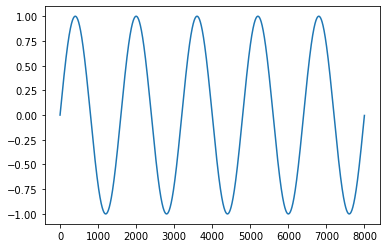

In [40]:
import matplotlib.pyplot as plt
import numpy as np


Fs = 8000
f = 5
sample = 8000
x = np.arange(sample)
y = np.sin(2 * np.pi * f * x / Fs)
plt.plot(x, y)
plt.show()

In [38]:
h = nolds.dfa(y)
h

2.001327195351909

In [37]:
SampEnt=nolds.sampen(y)
SampEnt

0.008369235372824734

### Real Data

Experimento: Una persona se puso sensores cardíacos por un día y estos guardaban datos de dicha persona mientras realizaba sus actividades normales y también mientras meditaba. Las mediciones se realizaban cada determinado tiempo.
Meditación: alteración de la respiración.

In [43]:
import pandas as pd

Normal = pd.read_csv (r'Normal.csv')
Meditation = pd.read_csv (r'Meditation.csv')

In [44]:
from numpy  import array
Ndata = array(Normal[1:450])
print(type(Ndata))

Mdata = array(Meditation[1:450])
print(type(Mdata))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


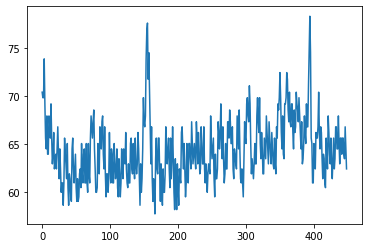

In [51]:
plt.plot(Ndata)

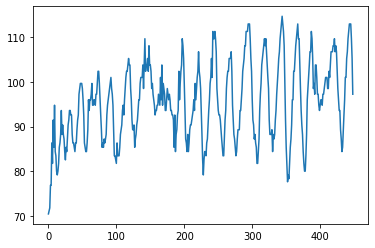

In [52]:
plt.plot(Mdata)

In [45]:
Ndfa = nolds.dfa(Ndata)
Ndfa

0.9103134201185563

In [53]:
Mdfa = nolds.dfa(Mdata)
Mdfa

1.4198117719155032

In [46]:
SampEnt=nolds.sampen(Ndata[:,0])
SampEnt

1.4811266762873443

In [47]:
SampEnt=nolds.sampen(Mdata[:,0])
SampEnt

0.9780368964719964

In [48]:
nolds.lyap_r(Mdata[:,0])

C:\Users\Manuel\Anaconda3\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 112
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
C:\Users\Manuel\Anaconda3\lib\site-packages\nolds\measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 21
  warnings.warn(msg.format(lag), RuntimeWarning)


-0.00039699162348288297

In [49]:
nolds.lyap_r(Ndata[:,0])

C:\Users\Manuel\Anaconda3\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 112
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
C:\Users\Manuel\Anaconda3\lib\site-packages\nolds\measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 21
  warnings.warn(msg.format(lag), RuntimeWarning)


-0.0027398557632615467